# unit 1.5 - gradient descent

Now we will learn what is "optimization" of the neural network weights

Recall we talked about:
- [loss](https://pytorch.org/docs/stable/nn.html#loss-functions)
- [optimizer](https://pytorch.org/docs/stable/optim.html)

When we train a neural network we want to minimize the error between the samples from the dataset and the output of the neural networks.

Training a neural network means minimizing the loss function over the dataset.

This is not much different from when you play basketball: you (the neural network) want to get the ball in the basket.

![](images/gd1.png)

The error function is how much you are off.

![](images/gd2.png)

The correction (change in the neural network weights) is how much you have to correct to get the right output (the ball in the basket).

![](images/gd3.png)

The you just try again...

![](images/gd4.png)

and again...

![](images/gd5.png)

until your error is $~0$ (the ball IS IN the basket!) 

This whole process is called "Gradient Descent" and it is the way to find a good set of weights for your neural network that minimizes the loss function.

![](images/gradient-descent.png)


We can now see an example of how this is implemented in python.

Here is a possible loss function f(x):

$f(x) = x³-4x²+6$

Let us compute its derivative f'(x):

$f’(x) = 3x²-8x$

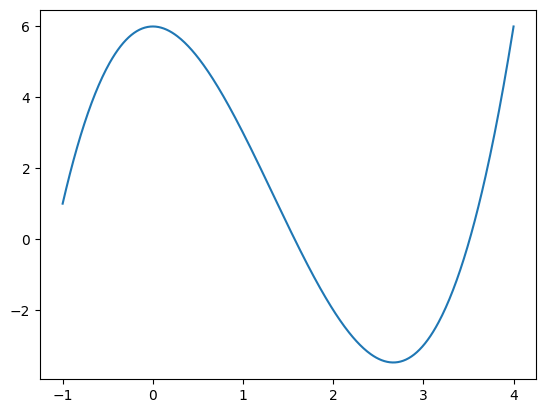

In [18]:
import numpy as np
import matplotlib.pyplot as plt

f_x = lambda x: (x**3)-4*(x**2)+6
f_x_derivative = lambda x: 3*(x**2)-8*x

x = np.linspace(-1,4,500) # plot the curve
plt.plot(x, f_x(x))
plt.show()

Gradient descent is the way we can find the minimum of a function like f(x).

Here is some code implementing gradient descent and an helper function to visualize the algorithm.

In [30]:
def plot_gradient(x, y, x_vis, y_vis):
    plt.subplot(1,2,2)
    plt.scatter(x_vis, y_vis, c = "b")
    plt.plot(x, f_x(x), c = "r")
    plt.title("Gradient Descent")
    plt.show()
    plt.subplot(1,2,1)
    plt.scatter(x_vis, y_vis, c = "b")
    plt.plot(x,f_x(x), c = "r")
    plt.xlim([2.0,3.0])
    plt.title("Zoomed in Figure")
    plt.show()
     
def gradient_desc(x_start, steps, learning_rate):
     
    # These x and y value lists will be used later for visualization.
    x_grad = [x_start]
    y_grad = [f_x(x_start)]
    # Keep looping until number of iterations
    for i in range(steps):
        # compute the derivative:
        x_start_derivative = f_x_derivative(x_start)
        
        # next point is - learning_rate * derivative:
        x_start -= (learning_rate * x_start_derivative)        
        
        # update the lists for visualization:
        x_grad.append(x_start)
        y_grad.append(f_x(x_start))
    
    print ("Local minimum occurs at: {:.2f}".format(x_start))    
    print ("Number of steps: ",len(x_grad)-1)
    plot_gradient(x, f_x(x) ,x_grad, y_grad)

We can now try this on our loss function f(x) and its derivative. 

We do this starting at value x = 0.5, using 100 steps, and with a learning-rate of 0.05

Local minimum occurs at: 2.67
Number of steps:  100


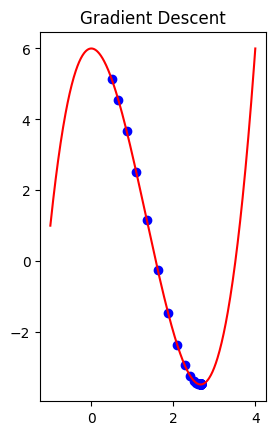

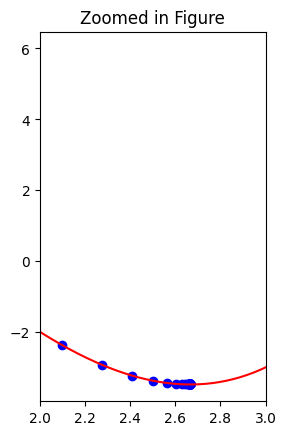

In [31]:
gradient_desc(0.5, 100, 0.05)

Note this notebook was inspired by [this post](https://machinelearningmind.com/2019/10/06/gradient-descent-introduction-and-implementation-in-python/).